# Reducing Traffic Mortality
### Project Description
While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing. By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of states with similar profiles. How can we find such groups in a statistically sound way and communicate the result effectively?

### Project Tasks
- [x] The raw data files and their format
- [x] Read in and get an overview of the data
- [x] Create a textual and a graphical summary of the data
- [x] Quantify the association of features and accidents
- [x] Fit a multivariate linear regression
- [x] Perform PCA on standardized data
- [ ] Visualize the first two principal components
- [ ] Find clusters of similar states in the data
- [ ] KMeans to visualize clusters in the PCA scatter plot
- [ ] Visualize the feature differences between the clusters
- [ ] Compute the number of accidents within each cluster
- [ ] Make a decision when there is no clear right choice

### [x] The raw data files and their format

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
miles = pd.read_csv('miles-driven.csv')
accidents = pd.read_csv('road-accidents.csv')

In [ ]:
miles.head()

In [ ]:
accidents.head(10)

Both files are not in currect format, and accidents file has some description of the data which we can be placed in another file to smoother our analysis.

Currecting the files forma

In [30]:
new_accidents = pd.read_csv("road-accidents copy.csv", delimiter='|')
new_miles = pd.read_csv('miles-driven.csv', delimiter='|')

Preview of the data

In [ ]:
new_accidents.head()

In [ ]:
new_miles.head()

Data is loaded in the currect formate so lets gets the overview of the data.

### [x] Read in and get an overview of the data

In [ ]:
round(new_accidents.describe())

In [ ]:
new_accidents.info()

In [ ]:
new_accidents.isnull().sum()

In [ ]:
new_accidents.duplicated().sum()

In [ ]:
round(new_miles.describe())

In [ ]:
new_miles.info()

In [ ]:
new_miles.isnull().sum()

In [ ]:
new_miles.duplicated().sum()

new_miles dataset has no null and duplicates values. also there is no need of changing the datatypes.

#### Joining the dataset with state

Both dataset has the same rows 51 and they both have same state column which can be used as key to join the both datasets.

In [5]:
joined_data = new_accidents.merge(new_miles, how='inner', on='state')
joined_data.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
0,Alabama,18.8,39,30,80,64914
1,Alaska,18.1,41,25,94,4593
2,Arizona,18.6,35,28,96,59575
3,Arkansas,22.4,18,26,95,32953
4,California,12.0,35,28,89,320784


Checking if data is merged currectly or not

In [ ]:
round(joined_data.describe())

In [ ]:
joined_data.info()

In [ ]:
joined_data.duplicated().sum()

Dataset is clean and ready for further process.

<AxesSubplot:title={'center':'Is there any Correlation between data?'}>

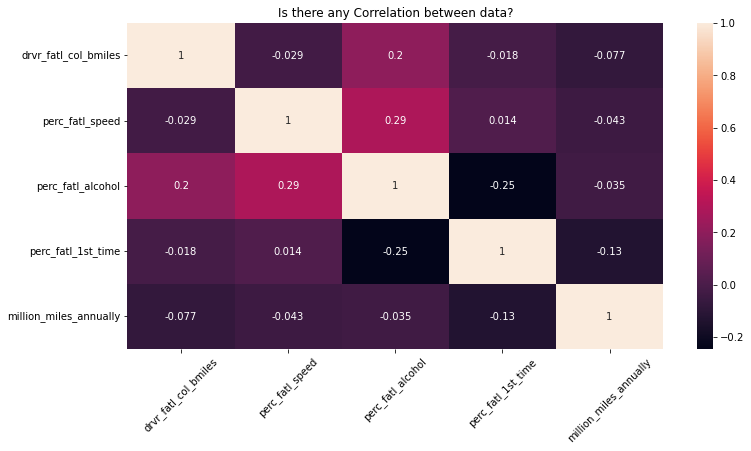

In [6]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title('Is there any Correlation between data?')
sns.heatmap(data=joined_data.corr(), annot=True)

In [35]:
# pd.plotting.scatter_matrix(joined_data, alpha=0.5, figsize=(16,12))

### [x] Quantify the association of features and accidents

To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:

- 0.2 = weak
- 0.5 = medium
- 0.8 = strong
- 0.9 = very strong

In [7]:
round(joined_data.corr(method='pearson'),2)

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
drvr_fatl_col_bmiles,1.00,-0.03,0.20,-0.02,-0.08
perc_fatl_speed,-0.03,1.00,0.29,0.01,-0.04
perc_fatl_alcohol,0.20,0.29,1.00,-0.25,-0.03
perc_fatl_1st_time,-0.02,0.01,-0.25,1.00,-0.13
million_miles_annually,-0.08,-0.04,-0.03,-0.13,1.00


we can see above that there is strong pairwise correlation between columns. however we can see weak pairwise correlation between

- perc_fatl_alcohol and perc_fatl_speed (0.29)
- perc_fatl_alcohol and drvr_fatl_col_bmiles (0.20)
- perc_fatl_alcohol and perc_fatl_1st_time (-0.25)

### [x] Fit a multivariate linear regression

load the required libraries for the modeling

correlation vs regression: 'https://www.statology.org/correlation-vs-regression/'

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [20]:
fetures = ['perc_fatl_speed', 'perc_fatl_alcohol','perc_fatl_1st_time']
X = new_accidents[fetures]
y = new_accidents.drvr_fatl_col_bmiles

#### standardizing the data

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X) 
x_scaled

array([[ 0.76264511, -0.1350496 , -1.26611685],
       [ 0.97232113, -1.1189824 ,  0.76536053],
       [ 0.34329308, -0.52862272,  1.05557158],
       [-1.43895304, -0.92219584,  0.91046605],
       [ 0.34329308, -0.52862272,  0.03983289],
       [ 0.5529691 , -0.52862272,  0.91046605],
       [ 1.49651116,  1.04566976, -0.9759058 ],
       [ 0.6578071 , -0.1350496 ,  1.49088816],
       [ 0.23845508, -0.72540928,  1.63599369],
       [-1.12443902, -0.33183616,  0.76536053],
       [-1.33411503, -1.1189824 ,  0.620255  ],
       [ 2.33521522,  2.02960256, -0.25037816],
       [ 0.44813109, -0.33183616,  1.34578263],
       [ 0.44813109,  0.65209664,  1.05557158],
       [-0.70508699, -0.33183616,  0.91046605],
       [-1.54379105, -1.1189824 , -0.25037816],
       [-0.49541097, -1.31576896, -0.54058922],
       [-1.33411503, -1.51255552, -1.84653896],
       [ 0.34329308,  0.45531008,  1.34578263],
       [ 0.6578071 , -0.1350496 , -0.68569475],
       [ 0.23845508,  0.25852352,  1.490

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=.2, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.0011408940758728114

In [24]:
X.shape

(51, 3)

In [39]:
pred = model.predict(X_test)
pred

array([16.50749146, 14.864296  , 16.14174517, 17.39340849, 15.87918824,
       12.83162505, 16.88286131, 15.35333654, 16.04435668, 17.31506876,
       15.56782166])

In [40]:
mean_absolute_error(y_test,pred)

3.242281590226291

### [x] Perform PCA on standardized data

We have learned that alcohol consumption is weakly associated with the number of fatal accidents across states. This could lead us to conclude that alcohol consumption should be a focus for further investigations and maybe strategies should divide states into high versus low alcohol consumption in accidents. But there are also associations between alcohol consumptions and the other two features, so it might be worth trying to split the states in a way that accounts for all three features.

In [25]:
from sklearn.decomposition import PCA

pca = PCA(0.95)# retain 95% of usefull features and create dimentions

x_pca = pca.fit_transform(X)
x_pca.shape

(51, 3)

In [26]:
x_pca

array([[  7.1411757 ,  -7.55229146,   4.63574677],
       [  7.83817655,   7.4086459 ,   5.46311796],
       [  2.53316505,   7.97326   ,   0.93122389],
       [-14.49958192,   6.28291258,  -0.08280585],
       [  2.6587585 ,   1.30028368,   3.04205628],
       [  4.50952989,   7.17537755,   1.607512  ],
       [ 15.17205428,  -6.85332902,  -0.26491041],
       [  5.82106773,  10.48237288,  -1.28102576],
       [  1.28013887,  12.00060635,   0.4725227 ],
       [-10.93786452,   4.68697917,  -2.02372463],
       [-13.68653365,   4.74596483,   1.6425185 ],
       [ 23.92627152,  -2.92490267,  -4.94798065],
       [  3.6785397 ,   9.66560763,  -0.41935983],
       [  4.72465871,   6.29945812,  -4.49056021],
       [ -7.0389606 ,   5.95106127,  -1.57579085],
       [-15.53730504,  -1.12912903,   3.07706278],
       [ -5.91135363,  -1.9667773 ,   6.48871997],
       [-13.78561506, -10.87600085,   8.63854388],
       [  3.50751637,   8.42023981,  -4.34616643],
       [  6.09019655,  -3.81686

In [27]:
pca.explained_variance_ratio_

array([0.57108607, 0.30554439, 0.12336955])

In [28]:
pca.n_components_

3

In [29]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=1)
model1 = LinearRegression()
model1.fit(X_train_pca, y_train)
model1.score(X_test_pca, y_test)

0.0011408940758746988

### Lets see Top 10 State with high and low alcohol cunsumption rate.

In [31]:
alcohol_states_high = joined_data[['state','perc_fatl_alcohol']].sort_values('perc_fatl_alcohol', ascending=False).groupby('state').head()
alcohol_states_high.head()

,state,perc_fatl_alcohol
26,Montana,44
34,North Dakota,42
11,Hawaii,41
40,South Carolina,41
43,Texas,38


<AxesSubplot:title={'center':'Top 10 states where alcohol consumption is high'}, xlabel='state', ylabel='perc_fatl_alcohol'>

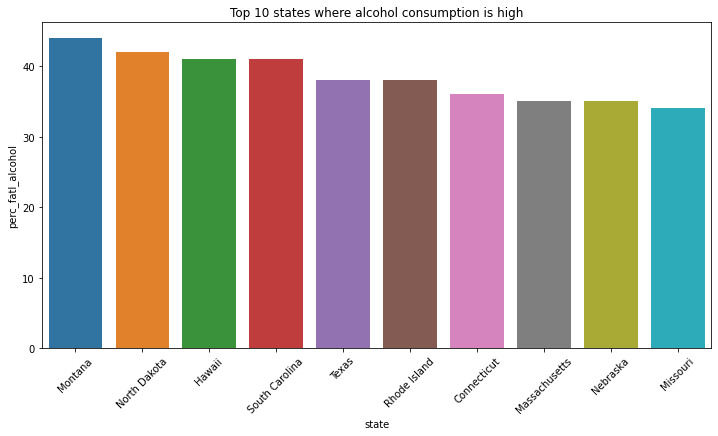

In [32]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title('Top 10 states where alcohol consumption is high')
sns.barplot(x='state', y='perc_fatl_alcohol', data=alcohol_states_high.head(10))

<AxesSubplot:title={'center':'Top 10 states where alcohol consumption is low'}, xlabel='state', ylabel='perc_fatl_alcohol'>

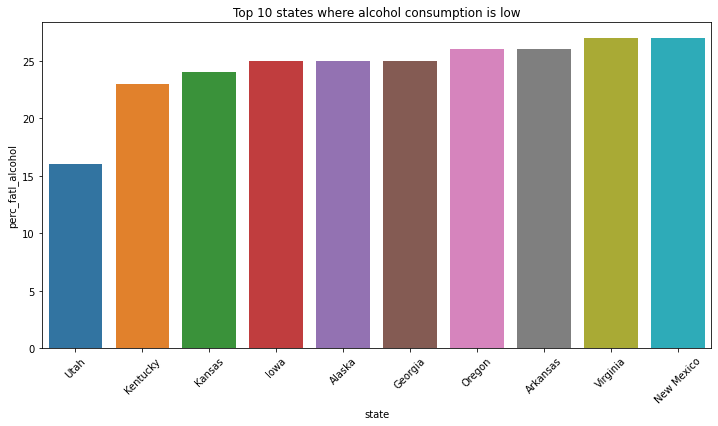

In [34]:
alcohol_states_low = joined_data[['state','perc_fatl_alcohol']].sort_values('perc_fatl_alcohol', ascending=True).groupby('state').head(10)
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title('Top 10 states where alcohol consumption is low')
sns.barplot(x='state', y='perc_fatl_alcohol', data=alcohol_states_low.head(10))

<AxesSubplot:xlabel='perc_fatl_alcohol', ylabel='perc_fatl_1st_time'>

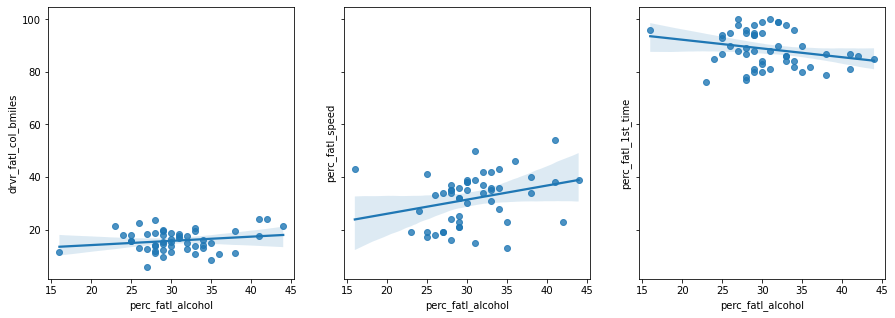

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.regplot(x='perc_fatl_alcohol', y='drvr_fatl_col_bmiles', ax=axes[0], data=joined_data)
sns.regplot(x='perc_fatl_alcohol', y='perc_fatl_speed', ax=axes[1], data=joined_data)
sns.regplot(x='perc_fatl_alcohol', y='perc_fatl_1st_time', ax=axes[2], data=joined_data)

Text(0, 0.5, 'pc2')

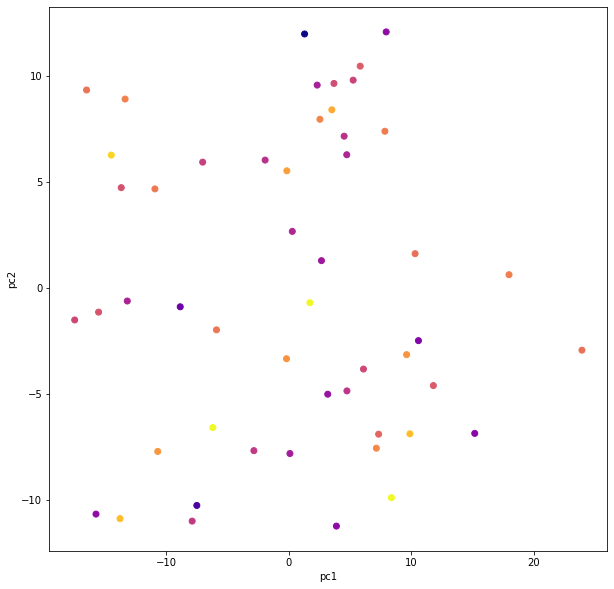

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0], x_pca[:,1],c=joined_data['drvr_fatl_col_bmiles'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')